In [1]:
#Import packages

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import math
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import linear_model, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.svm.libsvm import cross_validation
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
import scipy.stats
import numpy
from random import sample
import random
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

/Users/robbertmanders/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.svm.libsvm module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.svm. Anything that cannot be imported from sklearn.svm is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Import data
postcodes2017 = pd.read_excel("postcodes2017.xlsx")

# Adjust missing data for most recent homes
for i in postcodes2017.index:
    if postcodes2017.loc[i, 'WON_1524,N,10,0'] == -99997:
        postcodes2017.loc[i, 'WON_1524,N,10,0'] = 0

# Select relevant columns        
columns = ['PC4,N,5,0', 'INWONER,N,10,0', 'MAN,N,10,0', 'VROUW,N,10,0',
       'INW_014,N,10,0', 'INW_1524,N,10,0', 'INW_2544,N,10,0',
       'INW_4564,N,10,0', 'INW_65PL,N,10,0', 'GEBOORTE,N,10,0',
       'P_NL_ACHTG,N,10,0', 'P_WE_MIG_A,N,10,0', 'P_NW_MIG_A,N,10,0',
       'AANTAL_HH,N,10,0', 'TOTHH_EENP,N,10,0', 'TOTHH_MPZK,N,10,0',
       'HH_EENOUD,N,10,0', 'HH_TWEEOUD,N,10,0', 'GEM_HH_GR,N,19,11',
       'WONING,N,10,0', 'WONVOOR45,N,10,0', 'WON_4564,N,10,0',
       'WON_6574,N,10,0', 'WON_7584,N,10,0', 'WON_8594,N,10,0',
       'WON_9504,N,10,0', 'WON_0514,N,10,0', 'WON_1524,N,10,0',
       'WON_MRGEZ,N,10,0', 'P_HUURWON,N,10,0', 'P_KOOPWON,N,10,0',
       'WON_HCORP,N,10,0', 'WON_NBEW,N,10,0',
       'G_GAS_WON,N,10,0', 'G_ELEK_WON,N,10,0', 'UITKMINAOW,N,10,0', 'STED,N,10,0']

postcodes2017 = postcodes2017[columns]

# Set index to postal code
postcodes2017 = postcodes2017.set_index("PC4,N,5,0")

In [4]:
# Create data backup
data = postcodes2017.copy()

# Change missing data to NaN
for i in data.index:
    for j in data.columns:
        if data.loc[i, j] == -99997:
            data.loc[i,j] = float('NaN')

# Create percentage columns
data['PERC_EENP'] = data['TOTHH_EENP,N,10,0'] / data['AANTAL_HH,N,10,0'] * 100
data['PERC_MPZK'] = data['TOTHH_MPZK,N,10,0'] / data['AANTAL_HH,N,10,0'] * 100
data['PERC_EENOUD'] = data['HH_EENOUD,N,10,0'] / data['AANTAL_HH,N,10,0'] * 100
data['PERC_TWEEOUD'] = data['HH_TWEEOUD,N,10,0'] / data['AANTAL_HH,N,10,0'] * 100

data['PERC_MAN'] = data['MAN,N,10,0'] / data['INWONER,N,10,0'] * 100
data['PERC_VROUW'] = 100 - data['PERC_MAN']
data['PERC_014'] = data['INW_014,N,10,0'] / data['INWONER,N,10,0'] * 100
data['PERC_1524'] = data['INW_1524,N,10,0'] / data['INWONER,N,10,0'] * 100
data['PERC_2544'] = data['INW_2544,N,10,0'] / data['INWONER,N,10,0'] * 100
data['PERC_4564'] = data['INW_4564,N,10,0'] / data['INWONER,N,10,0'] * 100
data['PERC_65PL'] = data['INW_65PL,N,10,0'] / data['INWONER,N,10,0'] * 100

data['TOTAAL_WON'] = data['WONVOOR45,N,10,0'] + data['WON_4564,N,10,0'] + data['WON_6574,N,10,0'] + data['WON_7584,N,10,0'] + data['WON_8594,N,10,0'] + data['WON_9504,N,10,0'] + data['WON_0514,N,10,0'] + data['WON_1524,N,10,0']

data['PERC_WON_045'] = data['WONVOOR45,N,10,0'] / data['TOTAAL_WON'] * 100
data['PERC_WON_4564'] = data['WON_4564,N,10,0'] / data['TOTAAL_WON'] * 100
data['PERC_WON_6574'] = data['WON_6574,N,10,0'] / data['TOTAAL_WON'] * 100
data['PERC_WON_7584'] = data['WON_7584,N,10,0'] / data['TOTAAL_WON'] * 100
data['PERC_WON_8594'] = data['WON_8594,N,10,0'] / data['TOTAAL_WON'] * 100
data['PERC_WON_9504'] = data['WON_9504,N,10,0'] / data['TOTAAL_WON'] * 100
data['PERC_WON_0514'] = data['WON_0514,N,10,0'] / data['TOTAAL_WON'] * 100
data['PERC_WON_1524'] = data['WON_1524,N,10,0'] / data['TOTAAL_WON'] * 100

# Select relevant columns
columns = ['PERC_MAN', 'PERC_014', 'PERC_1524', 'PERC_2544',
       'PERC_4564', 'PERC_65PL',
       'P_NL_ACHTG,N,10,0', 'P_WE_MIG_A,N,10,0', 'P_NW_MIG_A,N,10,0', 'PERC_EENP', 'PERC_MPZK',
       'PERC_EENOUD', 'PERC_TWEEOUD', 'PERC_WON_045', 'PERC_WON_4564',
       'PERC_WON_6574', 'PERC_WON_7584', 'PERC_WON_8594',
       'PERC_WON_9504', 'PERC_WON_0514', 'PERC_WON_1524', 'G_GAS_WON,N,10,0', 'G_ELEK_WON,N,10,0', 'WON_MRGEZ,N,10,0', 'STED,N,10,0', 'GEM_HH_GR,N,19,11']

data = data[columns]

# Remove missing data
data = data.dropna()

# Create data backup
data2 = data.copy()

# # Scale data
# X = X.values
# min_max_scaler = preprocessing.StandardScaler()
# x_scaled = min_max_scaler.fit_transform(X)
# X = pd.DataFrame(x_scaled)
# X.columns = columns
# X.index = ind
# data = X.copy()

In [5]:
def dataPrep(data, iv, lasso, energy, data2):
    # This function runs an elastic net model for the data set. It takes parameters on whether to include
    # interaction variables and what energy type to run the analysis for
    
    X = data.copy()
    y = data2[energy]
    
    # Select relevant columns
    columns = ['PERC_MAN', 'PERC_1524', 'PERC_2544',
       'PERC_4564', 'PERC_65PL',
       'P_NL_ACHTG,N,10,0', 'P_WE_MIG_A,N,10,0', 'PERC_MPZK',
       'PERC_EENOUD', 'PERC_TWEEOUD', 'PERC_WON_4564',
       'PERC_WON_6574', 'PERC_WON_7584', 'PERC_WON_8594',
       'PERC_WON_9504', 'PERC_WON_0514', 'PERC_WON_1524',]
    
    X = X[columns]
    
    # Create interaction variables
    if iv == 1:
        vis = []
        fish = []

        for i in columns:
            for j in columns:
                if j not in fish:
                    vis.append([i,j])
            fish.append(i)
            
        columns2 = columns.copy()

        for i in vis:
            columns2.append(i)
            
        for i in columns2:
            if len(i) == 2:
                X[i[0] + ' x ' + i[1]] = X[i[0]] * X[i[1]]
                
    return X, y

def splitData(X, y):
    # Manually create trainig and test split, due to bug in Scikit package
    list1 = set(X.index)

    train = sample(list1, int(0.7 * len(list1)))

    X_train = X.loc[train, :]
    y_train = y[train]

    train = set(train)

    test = list1 - train

    X_test = X.loc[test, :]
    test = list(test)
    y_test = y[test]
    
    return X_train, y_train, X_test, y_test

def analyse(data, iv, lasso, energy, data2):
    
    X, y = dataPrep(data, iv, lasso, energy, data2)
    
    X_train, y_train, X_test, y_test = splitData(X, y)
    
    alphaValues = [0, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 30]
    scores = []
    scores2 = []

    for alpha in alphaValues:
        clf = linear_model.ElasticNet(alpha=alpha, l1_ratio = lasso)

        clf.fit(X_train, y_train)
        
        scores.append(sqrt(mean_squared_error(list(y_test), list(clf.predict(X_test)))))
        
        print(sum(abs(clf.coef_))/len(clf.coef_))
        print(len(clf.coef_[clf.coef_ != 0]))
        
        # R-squared
        coef = clf.coef_
        p = numpy.poly1d(coef)
        
        # fit values, and mean
        yhat = clf.predict(X_train)

        ybar = numpy.sum(y_train)/len(y_train)
        ybar = float(ybar)
        ssreg = numpy.sum((yhat - ybar)**2)
        sstot = numpy.sum((y_train - ybar)**2)
        print(ssreg / sstot)
        
        print('--------------------------')
            
        coef = clf.coef_
            
        MSE = np.mean((y_train - clf.predict(X_train).T)**2)
        var_est = MSE * np.diag(np.linalg.pinv(np.dot(X_train.T,X_train)))
        SE_est = np.sqrt(var_est)
                
        temp = pd.DataFrame()
        temp['Coef'] = coef
                
        tvalues = coef / SE_est
                
        #find p-value
        pvalues = []
        
        for val in tvalues:
            pvalues.append(scipy.stats.t.sf(abs(val), df=0.7*len(data)-len(coef)))
                    
        temp['P-value'] = pvalues
                
        length = len(temp[(temp['Coef'] != 0) & (temp['P-value'] < 0.01)])
            
        scores2.append([alpha, sum(abs(clf.coef_)), mean_squared_error(list(y_test), list(clf.predict(X_test))), length, ssreg / sstot])

    max_value = min(scores)
    max_index = scores.index(max_value)

    clf = linear_model.ElasticNet(alpha=alphaValues[max_index], l1_ratio = lasso)

    clf.fit(X_train,y_train)

    coef = clf.coef_
            
    MSE = np.mean((y_train - clf.predict(X_train).T)**2)
    var_est = MSE * np.diag(np.linalg.pinv(np.dot(X_train.T,X_train)))
    SE_est = np.sqrt(var_est)
            
    return [coef, SE_est, X, scores2]

In [8]:
coef, se, X, scores2 = analyse(data, 1, 0.3, 'G_GAS_WON,N,10,0', data2)
tvalues = coef / se

#find p-value
pvalues = []
for i in tvalues:
    pvalues.append(scipy.stats.t.sf(abs(i), df=0.7*len(data)-len(coef)))

results = pd.DataFrame(index=X.columns)

results['Coefficient'] = coef
results['Standard Error'] = se
results['P-value'] = pvalues

pd.DataFrame(scores2)

2.6440558354200494
170
0.757261353847733
--------------------------
2.636350935872076
170
0.7572505989152113
--------------------------
2.6127527275637084
170
0.7572097906410057
--------------------------
2.5843229378215358
170
0.7571633914660784
--------------------------
2.377633111254866
170
0.7569227281797718
--------------------------
2.1760160803099113
170
0.7567945720637678
--------------------------
1.490174613719712
170
0.7566621398710653
--------------------------
1.0960052912401863
170
0.7566440781578881
--------------------------
0.5497570365648606
169
0.7562080346620169
--------------------------
0.44994705985666256
163
0.7555291237927932
--------------------------
0.3542738752025895
153
0.7518003118387421
--------------------------
0.30891803110466826
151
0.7485609480752138
--------------------------
0.2559990302290726
147
0.7437366367432919
--------------------------
0.2248264853588301
141
0.7398799926006168
--------------------------


,0,1,2,3,4
0,0.0000,449.489492,41954.600055,11,0.757261
1,0.0001,448.179659,41953.353666,11,0.757251
2,0.0005,444.167964,41948.604973,11,0.757210
3,0.0010,439.334899,41943.165811,11,0.757163
4,0.0050,404.197629,41913.959038,11,0.756923
5,0.0100,369.922734,41896.595622,11,0.756795
6,0.0500,253.329684,41864.666703,11,0.756662
7,0.1000,186.320900,41833.210521,11,0.756644
8,0.5000,93.458696,41639.211929,11,0.756208
9,1.0000,76.491000,41498.465859,11,0.755529


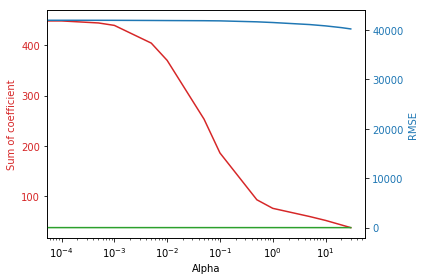

In [9]:
scores = pd.DataFrame(scores2)

fig, ax1 = plt.subplots()

plt.xscale('log')

color = 'tab:red'
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Sum of coefficient', color=color)
ax1.plot(scores[0], scores[1], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('RMSE', color=color)  # we already handled the x-label with ax1
ax2.plot(scores[0], scores[3], color=color)
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2.set_ylabel('RMSE', color=color)  # we already handled the x-label with ax1
ax2.plot(scores[0], scores[2], color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()